## 🌸 Machine Learning - Danielle Torres
### Classificação do dataset Iris

In [5]:
# Oculta warnings
import warnings
warnings.filterwarnings("ignore")

# Bibliotecas essenciais
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

# Pré-processamento e modelos
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# Modelos básicos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Ensembles
from sklearn.ensemble import (
    BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier,
    VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier
)

In [6]:
# Caminho do arquivo
dataset_path = "https://raw.githubusercontent.com/DanielleTorree/ML4Iris/main/api/MachineLearning/dataset/dataset_iris.csv"

# Leitura
dataset = pd.read_csv(dataset_path)

# Visualização inicial
print(dataset.head())
print(dataset.info())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [7]:
# Definições
test_size = 0.20
seed = 7

# Separação entre atributos (X) e classe (y)
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

# Holdout com estratificação
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=seed, stratify=y
)

# Validação cruzada estratificada
num_folds = 10
scoring = "accuracy"
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=seed)

In [8]:
np.random.seed(seed)

base_models = [
    ("LR", LogisticRegression(max_iter=200)),
    ("KNN", KNeighborsClassifier()),
    ("CART", DecisionTreeClassifier()),
    ("NB", GaussianNB()),
    ("SVM", SVC())
]

base_estimator = DecisionTreeClassifier()
num_trees = 100
max_features = 3

voting_models = [
    ("logistic", LogisticRegression(max_iter=200)),
    ("cart", DecisionTreeClassifier()),
    ("svm", SVC())
]

ensemble_models = [
    ("Bagging", BaggingClassifier(estimator=base_estimator, n_estimators=num_trees)),
    ("RF", RandomForestClassifier(n_estimators=num_trees, max_features=max_features)),
    ("ET", ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)),
    ("Ada", AdaBoostClassifier(n_estimators=num_trees)),
    ("GB", GradientBoostingClassifier(n_estimators=num_trees)),
    ("Voting", VotingClassifier(estimators=voting_models))
]

all_models = base_models + ensemble_models

In [9]:
results = []
names = []

for name, model in all_models:
    cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_scores)
    names.append(name)
    print(f"{name}: {cv_scores.mean():.4f} ({cv_scores.std():.4f})")

LR: 0.9500 (0.0408)
KNN: 0.9250 (0.0692)
CART: 0.9333 (0.0500)
NB: 0.9417 (0.0534)
SVM: 0.9583 (0.0417)
Bagging: 0.9333 (0.0624)
RF: 0.9417 (0.0534)
ET: 0.9417 (0.0534)
Ada: 0.9333 (0.0624)
GB: 0.9417 (0.0534)
Voting: 0.9500 (0.0408)


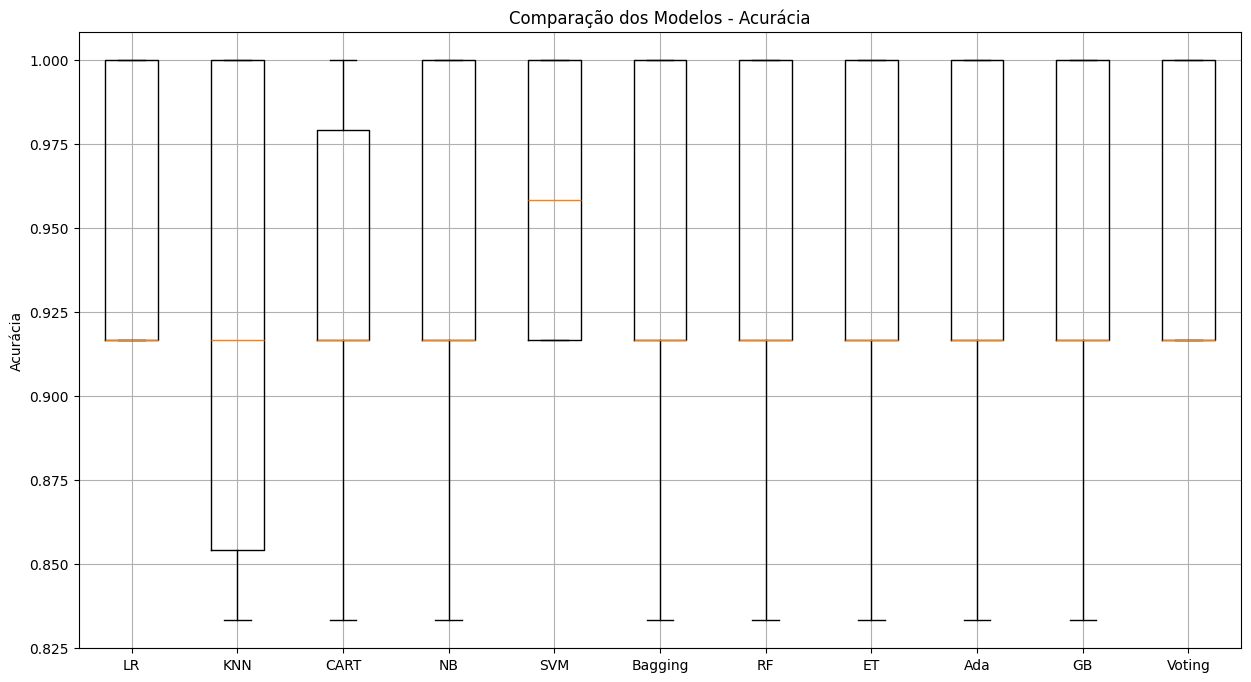

In [9]:
plt.figure(figsize=(15, 8))
plt.title("Comparação dos Modelos - Acurácia")
plt.boxplot(results, labels=names)
plt.ylabel("Acurácia")
plt.grid(True)
plt.show()

LR-orig: 0.9500 (0.0408)
LR-std: 0.9417 (0.0534)
LR-minmax: 0.9250 (0.0786)
KNN-orig: 0.9250 (0.0692)
KNN-std: 0.9417 (0.0651)
KNN-minmax: 0.9583 (0.0559)
CART-orig: 0.9333 (0.0500)
CART-std: 0.9417 (0.0534)
CART-minmax: 0.9333 (0.0500)
NB-orig: 0.9417 (0.0534)
NB-std: 0.9417 (0.0534)
NB-minmax: 0.9417 (0.0534)
SVM-orig: 0.9583 (0.0417)
SVM-std: 0.9417 (0.0534)
SVM-minmax: 0.9500 (0.0408)
Bagging-orig: 0.9417 (0.0534)
Bagging-std: 0.9417 (0.0534)
Bagging-minmax: 0.9417 (0.0534)
RF-orig: 0.9417 (0.0534)
RF-std: 0.9417 (0.0534)
RF-minmax: 0.9417 (0.0534)
ET-orig: 0.9417 (0.0534)
ET-std: 0.9417 (0.0534)
ET-minmax: 0.9417 (0.0534)
Ada-orig: 0.9333 (0.0624)
Ada-std: 0.9333 (0.0624)
Ada-minmax: 0.9333 (0.0624)
GB-orig: 0.9417 (0.0534)
GB-std: 0.9417 (0.0534)
GB-minmax: 0.9417 (0.0534)
Voting-orig: 0.9500 (0.0408)
Voting-std: 0.9417 (0.0534)
Voting-minmax: 0.9417 (0.0534)


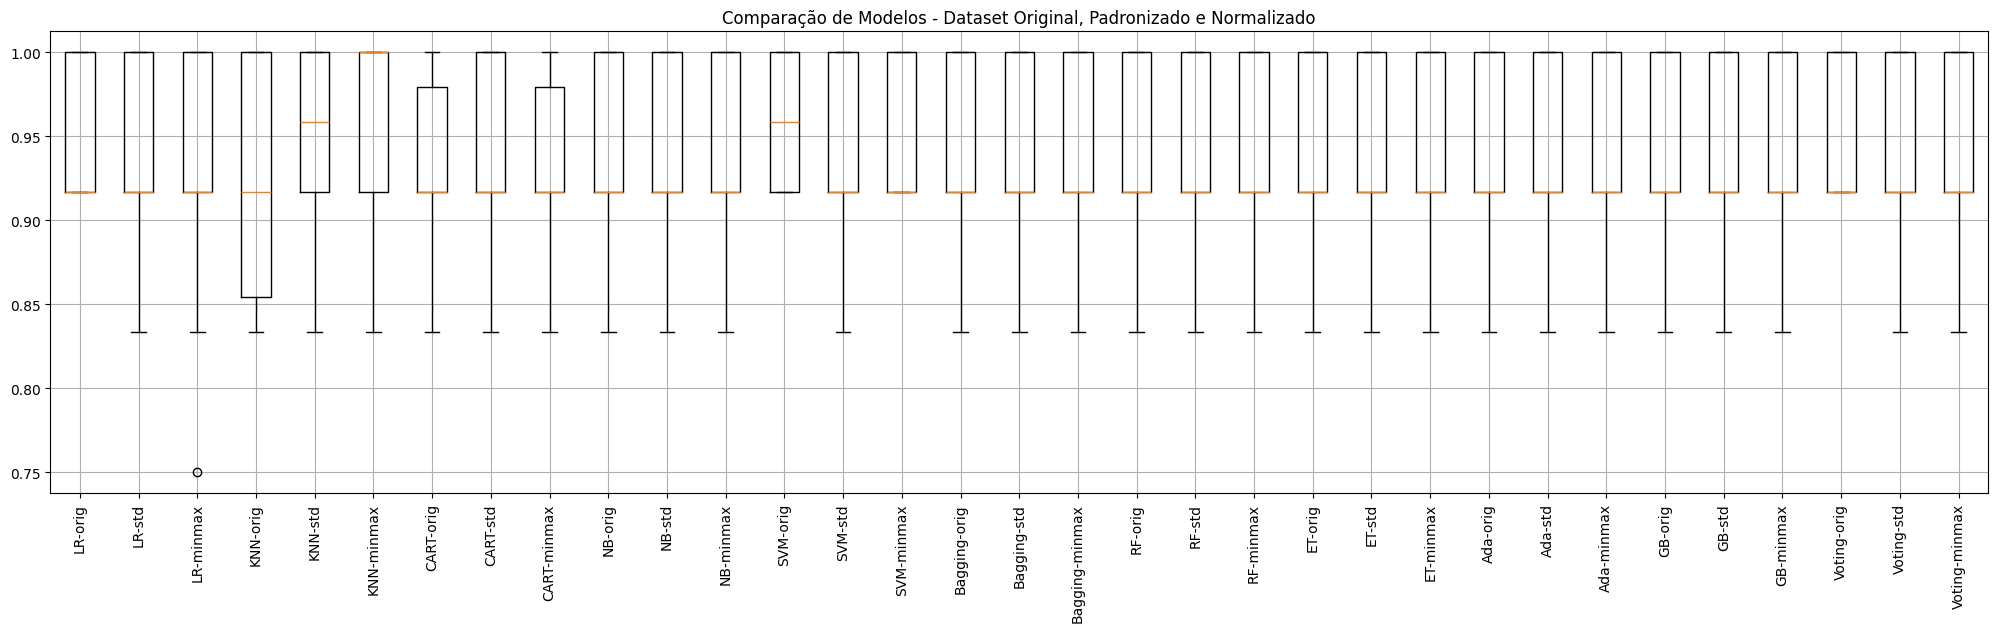

In [10]:
standard_scaler = ("StandardScaler", StandardScaler())
minmax_scaler = ("MinMxScaler", MinMaxScaler())

pipelines = []

for name, model in all_models: 
    pipelines.append((f"{name}-orig", Pipeline(steps=[(name, model)])))
    pipelines.append((f"{name}-std", Pipeline(steps=[standard_scaler, (name, model)])))
    pipelines.append((f"{name}-minmax", Pipeline(steps=[minmax_scaler, (name, model)])))

results = [] 
names = []

for name, pipeline in pipelines:
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})")

plt.figure(figsize=(25, 6))
plt.title("Comparação de Modelos - Dataset Original, Padronizado e Normalizado")
plt.boxplot(results, labels=names)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [11]:
param_grids = {
    "LR": {
        "LR__C": [0.5, 1, 2],
        "LR__solver": ["saga"],
    },
    "KNN": {
        "KNN__n_neighbors": [9, 11, 13],
        "KNN__metric": ["euclidean"],
    },
    "RF": {
        "RF__n_estimators": [5, 10, 20],
        "RF__max_features": ["sqrt"],
        "RF__max_depth": [None, 10],
        "RF__min_samples_split": [2, 5],
        "RF__min_samples_leaf": [1, 2],
    }
}

grid_models = ["LR", "KNN", "RF"]
kfold_gs = 5

for name, pipeline in pipelines:
    model_key = name.split("-")[0]
    if model_key in grid_models:
        param_grid = param_grids[model_key]
        grid = GridSearchCV(pipeline, param_grid=param_grid, scoring=scoring, cv=kfold_gs, n_jobs=-1)
        grid.fit(X_train, y_train)
        print(f"Modelo: {name} - Melhor: {grid.best_score_:.4f} usando {grid.best_params_}")

Modelo: LR-orig - Melhor: 0.9833 usando {'LR__C': 0.5, 'LR__solver': 'saga'}
Modelo: LR-std - Melhor: 0.9500 usando {'LR__C': 0.5, 'LR__solver': 'saga'}
Modelo: LR-minmax - Melhor: 0.9417 usando {'LR__C': 2, 'LR__solver': 'saga'}
Modelo: KNN-orig - Melhor: 0.9750 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 11}
Modelo: KNN-std - Melhor: 0.9583 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 9}
Modelo: KNN-minmax - Melhor: 0.9500 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 9}
Modelo: RF-orig - Melhor: 0.9583 usando {'RF__max_depth': None, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 2, 'RF__min_samples_split': 2, 'RF__n_estimators': 20}
Modelo: RF-std - Melhor: 0.9583 usando {'RF__max_depth': 10, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2, 'RF__n_estimators': 20}
Modelo: RF-minmax - Melhor: 0.9583 usando {'RF__max_depth': None, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 2, 'RF__min_samples_split': 5, '

In [12]:
from sklearn.pipeline import make_pipeline

np.random.seed(seed)

final_model = RandomForestClassifier(
    n_estimators=50,
    max_features="sqrt",
    min_samples_split=2,
    max_depth=10,
    min_samples_leaf=1,
)

pipeline_final = make_pipeline(MinMaxScaler(), final_model)
pipeline_final.fit(X_train, y_train)

y_pred = pipeline_final.predict(X_test)
print(f"Acurácia no conjunto teste: {accuracy_score(y_test, y_pred):.4f}")

Acurácia no conjunto teste: 1.0000


In [13]:
import os

os.makedirs("models", exist_ok=True)
os.makedirs("scalers", exist_ok=True)
os.makedirs("pipelines", exist_ok=True)
os.makedirs("data", exist_ok=True)

with open("models/rf_iris_classifier.pkl", "wb") as f:
    pickle.dump(final_model, f)

with open("scalers/minmax_scaler_iris.pkl", "wb") as f:
    pickle.dump(pipeline_final.named_steps["minmaxscaler"], f)

with open("pipelines/rf_iris_pipeline.pkl", "wb") as f:
    pickle.dump(pipeline_final, f)

pd.DataFrame(X_test, columns=dataset.columns[:-1]).to_csv("data/X_test_iris.csv", index=False)
pd.DataFrame(y_test, columns=[dataset.columns[-1]]).to_csv("data/y_test_iris.csv", index=False)

In [14]:
new_data = pd.DataFrame({
    "SepalLengthCm": [5.1, 6.2, 5.9, 4.7],
    "SepalWidthCm": [3.5, 2.8, 3.0, 3.2],
    "PetalLengthCm": [1.4, 4.8, 4.2, 1.3],
    "PetalWidthCm": [0.2, 1.8, 1.3, 0.2]
})

X_new = new_data.values.astype(float)
X_new_scaled = pipeline_final.named_steps["minmaxscaler"].transform(X_new)
predictions = final_model.predict(X_new_scaled)
print("Previsões para novos dados:", predictions)

Previsões para novos dados: ['Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa']
